<a href="https://colab.research.google.com/github/suelensantos/packt-data-science-workshop/blob/master/Chap_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Binary Classification

#### Exercise 3.01

In [0]:
import pandas as pd

In [0]:
file_url = "https://raw.githubusercontent.com/PacktWorkshops/The-Data-Science-Workshop/master/Chapter03/bank-full.csv"

In [0]:
# Loading the data using pandas
bankData = pd.read_csv(file_url, sep=";")
bankData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [0]:
# Printing the shape of the data
print(bankData.shape)

(45211, 17)


In [0]:
# Summarizing the statistics of the numerical raw data
bankData.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


#### Testing Business Hypotheses Using Exploratory Data Analysis

In [0]:
# EDA - Exploratory Data Analysis

In [0]:
import matplotlib.pyplot as plt
import numpy as np

In [0]:
# Create a simple list of categories
jobList = ['admin', 'scientist', 'doctor', 'management']

In [0]:
# Getting two categories ('yes', 'no') for each of jobs
jobYes = [20,60,70,40]
jobNo = [80,40,30,60]

In [0]:
# Get the length of x axis labels and arranging its indexes
xlabels = len(jobList)
ind = np.arange(xlabels)

In [0]:
xlabels

4

In [0]:
ind

array([0, 1, 2, 3])

In [0]:
# Get width of each bar
width = 0.35

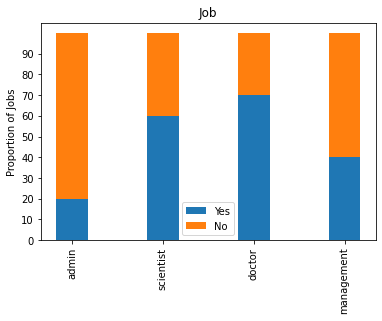

In [0]:
# Getting the plots
p1 = plt.bar(ind, jobYes, width)
p2 = plt.bar(ind, jobNo, width, bottom=jobYes) # jobNo acima de jobYes

# Getting the labels for the plots
plt.ylabel('Proportion of Jobs')
plt.title('Job')

# Defining the x label indexes and y label indexes
plt.xticks(ind, jobList)
plt.yticks(np.arange(0, 100, 10))

# Defining the legends
plt.legend((p1[0], p2[0]), ('Yes', 'No'))

# To rotate the axis labels
plt.xticks(rotation=90)
plt.show()

#### Exercise 3.02

In [0]:
# Hypothesis: The propensity to buy term deposits is more with elderly customers compared to younger ones.

In [0]:
import altair as alt

In [0]:
bankData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [0]:
# We will be verifying how the purchased term deposits are distributed by age.

filter_mask = bankData['y'] == 'yes'

# Call .groupby() and pass the name of the column you want to group on, which is "age". 
# Then, you use ["y"] to specify the columns on which you want to perform the actual aggregation.

bankSub1 = bankData[filter_mask].groupby('age')['y'].agg(agegrp='count').reset_index()
bankSub1.head()

,age,agegrp
0,18,7
1,19,11
2,20,15
3,21,22
4,22,40


In [0]:
# Visualising the relationship using altair

alt.Chart(bankSub1).mark_line().encode(x='age', y='agegrp')

alt.Chart(...)

In [0]:
# Getting another perspective

# print(bankData.groupby('age').groups)

ageTot = bankData.groupby('age')['y'].agg(ageTot='count').reset_index()
ageTot.head()

,age,ageTot
0,18,12
1,19,35
2,20,50
3,21,79
4,22,129


In [0]:
# Getting all the details in one place

ageProp = bankData.groupby(['age', 'y'])['y'].agg(ageCat='count').reset_index()
ageProp.head()

,age,y,ageCat
0,18,no,5
1,18,yes,7
2,19,no,24
3,19,yes,11
4,20,no,35


In [0]:
# Merging both the data frames

ageComb = pd.merge(ageProp, ageTot, left_on=['age'], right_on=['age'])
ageComb['catProp'] = (ageComb.ageCat/ageComb.ageTot)*100
ageComb.head()

,age,y,ageCat,ageTot,catProp
0,18,no,5,12,41.666667
1,18,yes,7,12,58.333333
2,19,no,24,35,68.571429
3,19,yes,11,35,31.428571
4,20,no,35,50,70.000000


In [0]:
# Visualising the relationship using altair

alt.Chart(ageComb).mark_line().encode(x='age', y='catProp').facet(column='y')

alt.FacetChart(...)

In [0]:
# Caso os charts não apareçam, visualizar elas no google colaboration!